In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data

from statsmodels.formula.api import ols

import split_scale as ss
import explore as ex
import evaluate as ev

---
### 1. Load the tips dataset from either pydataset or seaborn.

In [2]:
tips_df = data("tips")
tips_df

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


---
### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [3]:
# get x (total_bill) and y (tip)
tips_df = tips_df[["total_bill", "tip"]]
tips_df

,total_bill,tip
1,16.99,1.01
2,10.34,1.66
3,21.01,3.50
4,23.68,3.31
5,24.59,3.61
...,...,...
240,29.03,5.92
241,27.18,2.00
242,22.67,2.00
243,17.82,1.75


In [4]:
# split data
train, test = ss.split_my_data(tips_df, .8, 56)
train.shape, test.shape

((195, 2), (49, 2))

In [5]:
train.head()

,total_bill,tip
3,21.01,3.50
99,21.01,3.00
155,19.77,2.00
196,7.56,1.44
61,20.29,3.21


In [6]:
test.head()

,total_bill,tip
13,15.42,1.57
43,13.94,3.06
126,29.80,4.20
202,12.74,2.01
127,8.52,1.48


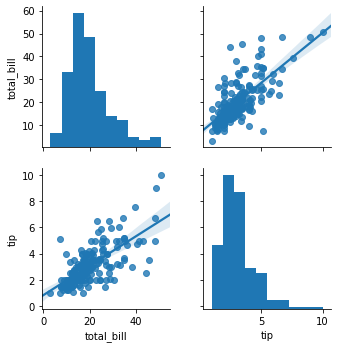

In [7]:
# 'splorin
ex.plot_variable_pairs(train)

In [8]:
print("mean tip (train) =", train.tip.mean())
print("median tip (train) =", train.tip.median())

mean tip (train) = 3.0811282051282047
median tip (train) = 3.0


In [9]:
train["yhat_baseline"] = train.tip.mean()
train.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,total_bill,tip,yhat_baseline
3,21.01,3.50,3.081128
99,21.01,3.00,3.081128
155,19.77,2.00,3.081128
196,7.56,1.44,3.081128
61,20.29,3.21,3.081128


In [10]:
# code below fits a linear regression model on the train dataset
# using tips as y/target variable and total_bill as x/feature
ols_model = ols("tip ~ total_bill", data=train).fit()
predictions = ols_model.predict(train.total_bill)

In [11]:
train["yhat"] = predictions
train.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,total_bill,tip,yhat_baseline,yhat
3,21.01,3.50,3.081128,3.203884
99,21.01,3.00,3.081128,3.203884
155,19.77,2.00,3.081128,3.064583
196,7.56,1.44,3.081128,1.692911
61,20.29,3.21,3.081128,3.122999


---
### 3. Plot the residuals for the linear regression model that you made.

In [12]:
# compute residuals
train["residual_baseline"] = train["yhat_baseline"] - train["tip"]
train["residual"] = train["yhat"] - train["tip"]
train

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,total_bill,tip,yhat_baseline,yhat,residual_baseline,residual
3,21.01,3.50,3.081128,3.203884,-0.418872,-0.296116
99,21.01,3.00,3.081128,3.203884,0.081128,0.203884
155,19.77,2.00,3.081128,3.064583,1.081128,1.064583
196,7.56,1.44,3.081128,1.692911,1.641128,0.252911
61,20.29,3.21,3.081128,3.122999,-0.128872,-0.087001
...,...,...,...,...,...,...
163,16.21,2.00,3.081128,2.664652,1.081128,0.664652
193,28.44,2.56,3.081128,4.038570,0.521128,1.478570
144,27.05,5.00,3.081128,3.882418,-1.918872,-1.117582
229,13.28,2.72,3.081128,2.335496,0.361128,-0.384504


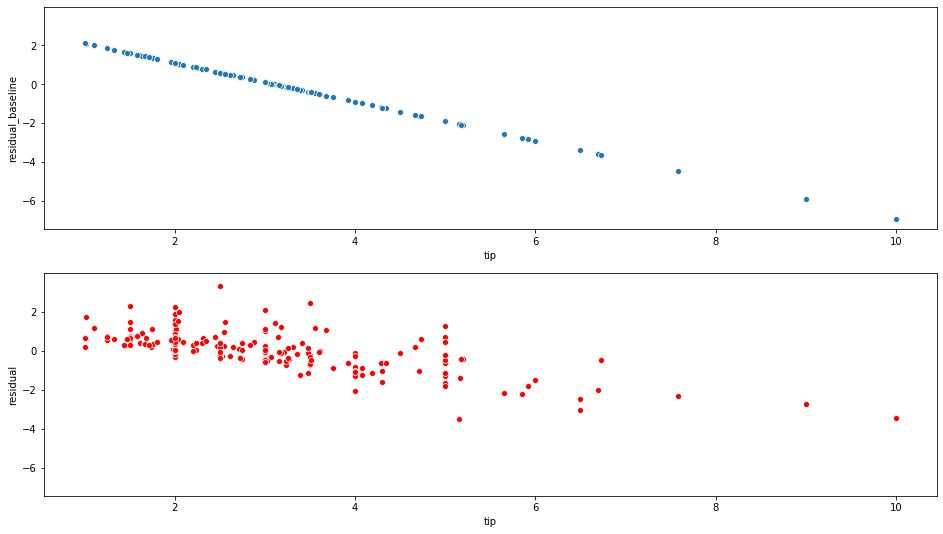

In [13]:
fig, axs = plt.subplots(2, 1, sharey=True, figsize=(16, 9))

# sns.lineplot(x=range(round(train.total_bill.min()), round(train.total_bill.max())), y=0, color="green", ax=axs[0])
sns.scatterplot(x="tip", y="residual_baseline", data=train, ax=axs[0]) # residual baseline
# sns.lineplot(x=range(round(train.total_bill.min()), round(train.total_bill.max())), y=0, color="green", ax=axs[1])
sns.scatterplot(x="tip", y="residual", data=train, ax=axs[1], color="red") # residual
plt.show()

> The trend in the residual_baseline plot above (that is not shown in the model residual) indicates that there is more information we can use from total_bill to predict our target variable (tip).

---
### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [14]:
from sklearn.metrics import mean_squared_error

#### SSE - sum of squared errors

$ SSE = \sum_{i=1}^{n}(\hat{y}-y_{i})^2 $

$ MSE = \frac{1}{n}\sum_{i=1}^{n} (\hat{y}-y_{i})^2 $

$ n * MSE =\sum_{i=1}^{n} (\hat{y}-y_{i})^2 = SSE $

In [15]:
SSE = mean_squared_error(train.tip, train.yhat)*train.shape[0]
SSE_baseline = mean_squared_error(train.tip, train.yhat_baseline)*train.shape[0]
print("SSE =", SSE)
print("SSE_baseline =", SSE_baseline)

SSE = 201.90426276846716
SSE_baseline = 398.9789517948719


In [16]:
if SSE < SSE_baseline:
    print("Model outperforms baseline")
else:
    print("Model is useless")

Model outperforms baseline


#### ESS - explained sum of squares

In [17]:
ESS = sum((train.yhat - train.tip.mean())**2)
print("ESS =", ESS)

ESS = 197.0746890264042


#### TSS - total sum of squares

In [18]:
TSS = ESS + SSE
print("TSS =", TSS)

TSS = 398.97895179487136


#### MSE - mean squared error

$ MSE = \frac{1}{n}\sum_{i=1}^{n} (\hat{y}-y_{i})^2 $

In [19]:
MSE = mean_squared_error(train.tip, train.yhat)
MSE_baseline = mean_squared_error(train.tip, train.yhat_baseline)
print("MSE =", MSE)
print("MSE_baseline =", MSE_baseline)

MSE = 1.035406475735729
MSE_baseline = 2.0460459066403685


#### RMSE - root mean squared error

$ RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n} (\hat{y}-y_{i})^2} $

In [20]:
from math import sqrt

In [21]:
RMSE = sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)
print("RMSE =", RMSE)
print("RMSE_baseline =", RMSE_baseline)

RMSE = 1.017549249783876
RMSE_baseline = 1.430400610542504


---
### 7. What is the amount of variance explained in your model?

In [22]:
from sklearn.metrics import explained_variance_score

In [23]:
R2 = ols_model.rsquared
print("R-squared =", round(R2, 3))
print("ESS / TSS =", round(ESS / TSS, 3))
print(round(R2) == round(ESS / TSS))

R-squared = 0.494
ESS / TSS = 0.494
True


In [24]:
evs = explained_variance_score(train.tip, train.yhat)
print("R-squared =", round(R2, 3))
print("Explained Variance =", round(evs, 3))
print(round(R2) == round(evs))

R-squared = 0.494
Explained Variance = 0.494
True


---
### 8. Is your model significantly better than the baseline model?

In [25]:
alpha = .001 # significance
f_pval = ols_model.f_pvalue

print("p-value (or model significance) =", f_pval)

p-value (or model significance) = 2.3140440906691813e-30


In [26]:
if f_pval < alpha:
    print("Model is significantly better than baseline model")
else:
    print("Model is useless")

Model is significantly better than baseline model


In [27]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     188.4
Date:                Fri, 03 Apr 2020   Prob (F-statistic):           2.31e-30
Time:                        14:44:36   Log-Likelihood:                -280.09
No. Observations:                 195   AIC:                             564.2
Df Residuals:                     193   BIC:                             570.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8436      0.179      4.720      0.000       0.491       1.196
total_bill     0.1123      0.008     13.725      0.000       0.096       0.128
==============================================================================
Omnibus:                       17.866   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.888
Skew:                           0.487   Prob(JB):                     1.96e-07
Kurtosis:                       4.689   Cond. No.                         53.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---
### 9.Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false
- model_significance(ols_model): that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the rsquared and f_pvalue properties from the ols model)

> plot_residuals(y, yhat): creates a residual plot

In [28]:
# def plot_residuals(x, y, yhat, yhat_baseline, df):
#     residual = yhat - y
#     residual_baseline = yhat_baseline - y
#     fig, axs = plt.subplots(2, 1, sharex=True, figsize=(16, 9))
#     ax1 = axs[0]
#     ax2 = axs[1]
#     ax1.set_title('yhat residual')
#     ax2.set_title('yhat residual_baseline')
#     fig.text(.1, 0.5, 'residuals', ha='center', va='center', rotation='vertical')
#     sns.lineplot(x=range(round(x.min()), round(x.max())), y=0, data=df, color="green", ax=axs[0])
#     sns.scatterplot(x=x, y=residual, data=df, color="navy", ax=axs[0]) # residual
#     sns.lineplot(x=range(round(x.min()), round(x.max())), y=0, data=df, color="green", ax=axs[1])
#     sns.scatterplot(x=x, y=residual_baseline, data=df, color="crimson", ax=axs[1]) # residual baseline
#     plt.show()

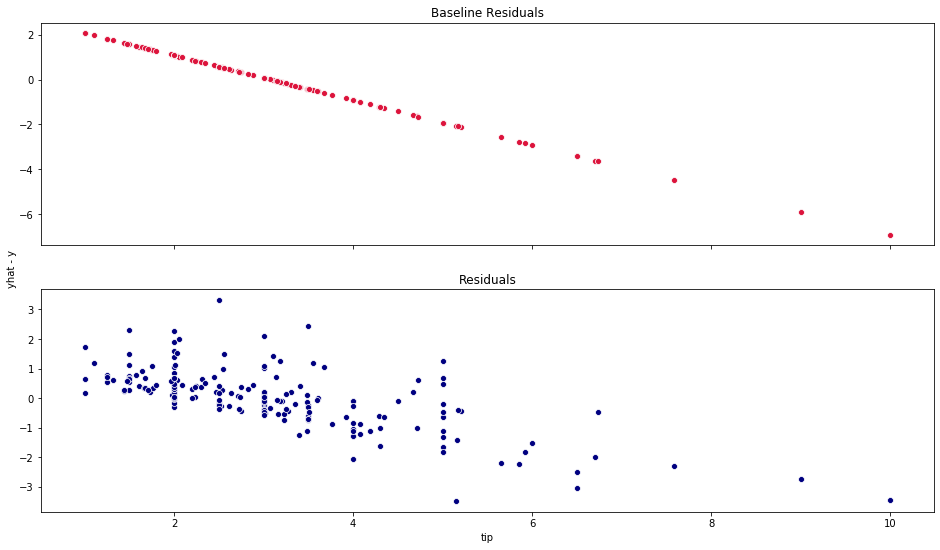

In [29]:
ev.plot_residuals(y=train.tip, yhat=train.yhat, yhat_baseline=train.yhat_baseline, df=train)

> regression_errors(y, yhat): returns the following values:
> - sum of squared errors (SSE)
> - explained sum of squares (ESS)
> - total sum of squares (TSS)
> - mean squared error (MSE)
> - root mean squared error (RMSE)

In [30]:
def regression_errors(y, yhat, df):
    SSE = mean_squared_error(y, yhat)*df.shape[0]
    ESS = sum((yhat - y.mean())**2)
    TSS = ESS + SSE
    MSE = mean_squared_error(y, yhat)
    RMSE = sqrt(MSE)
    return SSE, ESS, TSS, MSE, RMSE

In [31]:
SSE, ESS, TSS, MSE, RMSE = ev.regression_errors(y=train.tip, yhat=train.yhat, df=train)
print("SSE =", SSE)
print("ESS =", ESS)
print("TSS =", TSS)
print("MSE =", MSE)
print("RMSE =", RMSE)

SSE = 201.90426276846716
ESS = 197.0746890264042
TSS = 398.97895179487136
MSE = 1.035406475735729
RMSE = 1.017549249783876


> baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

In [32]:
def baseline_mean_errors(y, yhat_baseline, df):
    SSE_baseline = mean_squared_error(y, yhat_baseline)*df.shape[0]
    MSE_baseline = mean_squared_error(y, yhat_baseline)
    RMSE_baseline = sqrt(MSE_baseline)
    return SSE_baseline, MSE_baseline, RMSE_baseline

In [33]:
SSE_baseline, MSE_baseline, RMSE_baseline = ev.baseline_mean_errors(y=train.tip, yhat_baseline=train.yhat_baseline, df=train)
print("SSE_baseline =", SSE_baseline)
print("MSE_baseline =", MSE_baseline)
print("RMSE_baseline =", RMSE_baseline)

SSE_baseline = 398.9789517948719
MSE_baseline = 2.0460459066403685
RMSE_baseline = 1.430400610542504


> better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [34]:
def better_than_baseline(y, yhat, yhat_baseline, df):
    SSE, ESS, TSS, MSE, RMSE = regression_errors(y=y, yhat=yhat, df=df)
    SSE_baseline, MSE_baseline, RMSE_baseline = baseline_mean_errors(y=y, yhat_baseline=yhat_baseline, df=df)
    if SSE < SSE_baseline and MSE < MSE_baseline and RMSE < RMSE_baseline:
        return True
    else:
        return False

In [35]:
ev.better_than_baseline(y=train.tip, yhat=train.yhat, yhat_baseline=train.yhat_baseline, df=train)

True

> model_significance(ols_model): that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the rsquared and f_pvalue properties from the ols model)

In [36]:
def model_significance(ols_model):
    """
    Takes in ordinary least squares model and returns the F p-value
    """
    f_pval = ols_model.f_pvalue
    return print(f"p-value for model significance = {f_pval}")

In [37]:
ev.model_significance(ols_model)

p-value for model significance = 2.3140440906691813e-30


### 10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [38]:
mpg_df = data("mpg")

In [39]:
mpg_df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [40]:
mpg_df = mpg_df[["displ", "hwy"]]
mpg_df

,displ,hwy
1,1.8,29
2,1.8,29
3,2.0,31
4,2.0,30
5,2.8,26
...,...,...
230,2.0,28
231,2.0,29
232,2.8,26
233,2.8,26


In [41]:
train, test = ss.split_my_data(mpg_df, .8, 56)

In [42]:
train.head()

,displ,hwy
117,2.0,29
145,2.5,32
5,2.8,26
1,1.8,29
64,5.9,15


In [43]:
train.shape

(187, 2)

In [44]:
test.head()

,displ,hwy
93,4.0,26
214,2.0,29
133,4.4,18
61,4.7,17
31,5.7,15


In [45]:
test.shape

(47, 2)

In [46]:
ols_model = ols("hwy ~ displ", data=train).fit()
predictions = ols_model.predict(train.displ)

In [47]:
train.hwy.mean(), train.hwy.median()

(23.58288770053476, 25.0)

In [48]:
train["yhat_baseline"] = train.hwy.median()
train

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,displ,hwy,yhat_baseline
117,2.0,29,25.0
145,2.5,32,25.0
5,2.8,26,25.0
1,1.8,29,25.0
64,5.9,15,25.0
...,...,...,...
163,2.5,25,25.0
193,3.3,27,25.0
144,2.5,31,25.0
229,1.8,29,25.0


In [49]:
train["yhat"] = predictions
train

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,displ,hwy,yhat_baseline,yhat
117,2.0,29,25.0,28.769336
145,2.5,32,25.0,27.016144
5,2.8,26,25.0,25.964229
1,1.8,29,25.0,29.470612
64,5.9,15,25.0,15.094439
...,...,...,...,...
163,2.5,25,25.0,27.016144
193,3.3,27,25.0,24.211037
144,2.5,31,25.0,27.016144
229,1.8,29,25.0,29.470612


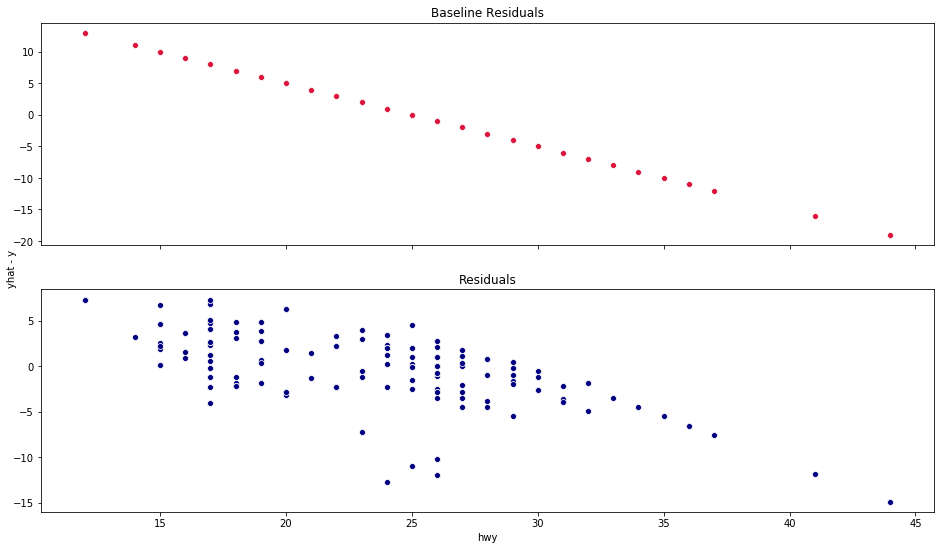

In [50]:
ev.plot_residuals(train.hwy, train.yhat, train.yhat_baseline, df=train)

In [51]:
ev.regression_errors(train.hwy, train.yhat, train)

(2862.7662615171776,
 3902.6989791245373,
 6765.465240641715,
 15.308910489396672,
 3.9126602829017334)

In [52]:
ev.baseline_mean_errors(train.hwy, train.yhat_baseline, train)

(7141.0, 38.18716577540107, 6.179576504535005)

In [53]:
ev.better_than_baseline(train.hwy, train.yhat, train.yhat_baseline, train)

True

In [54]:
ev.model_significance(ols_model)

p-value for model significance = 2.1662415192607214e-36


---
### Walk-through Notes

In [55]:
# use below for comparing your functions to sklearn functions (or any other lib) - LOL
np.isclose?

In [56]:
%%timeit # calculates the amount of time it takes a function to run

ev.better_than_baseline(train.hwy, train.yhat, train.yhat_baseline, train)

1.39 ms ± 5.13 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
